# Bayes decision theory


## Introduction

In this lecture we will cover the following topics:

- Bayesian decision theory
- The naïve Bayes assumption
- Bayes classifier minimizes probablity of error
- Risk minimization
- Discriminant functions and decision surfaces

In [12]:
#Imports

import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo


---

## A motivating example: Ending Spam


### Spam

- It's the early 2000, and spam emails offering you to buy Viagra are flourishing.
- Cannot just filter on keywords.
- Mathmatically, we want to find $P(\text{spam}|\text{content})$.

<p float="left">
    <img src="media/endingspam.png" width="300" style="margin-right: 50px;" />
    <img src="media/spam_example.png" width="800" />
</p>


### Tokenization and learning

- Break email into words $W_i$
- Discrete events: $P(W_i)\geq 0$
- Notation
    - S: Spam (Illegitimate messages)
    - H: Ham (Legitimate messages)
- How to get an expression for $P(\text{spam}|\text{content})$?
- Bayes' rule:
    - $P(S|W_i)=\frac{P(W_i|S)P(S)}{P(W_i)}$
- where:
    - $P(W_i)=P(W_i|S)P(S)+P(W_i|H)P(H)$

### How to learn from data

- Collect Spam and Ham and learn (estimate) $P(W_i|S)$ and $P(W_i|H)$!
- Example
    - W_i = "Viagra"
- Let us look at the data.

23


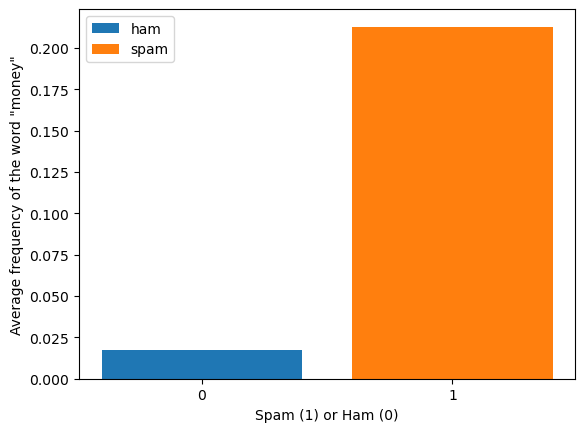

In [21]:
# Load and visualize data

# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features
y = spambase.data.targets

#print(spambase.variables['name'])
index_for_frequency_of_word_money = 23
index_for_frequency_of_word_george = 23

ham_indices = np.where(y == 0)[0]
spam_indices = np.where(y == 1)[0]

plt.figure(1)
plt.subplot(121)
plt.bar(0, X.iloc[ham_indices, index_for_frequency_of_word_money].mean(), label='ham')
plt.bar(1, X.iloc[spam_indices, index_for_frequency_of_word_money].mean(), label='spam')
plt.xticks([0, 1], [0, 1])
plt.ylabel('Average frequency of the word "money"')
plt.xlabel('Spam (1) or Ham (0)')
plt.legend()
plt.subplot(122)
plt.subplot(121)
plt.bar(0, X.iloc[ham_indices, index_for_frequency_of_word_money].mean(), label='ham')
plt.bar(1, X.iloc[spam_indices, index_for_frequency_of_word_money].mean(), label='spam')
plt.xticks([0, 1], [0, 1])
plt.ylabel('Average frequency of the word "money"')
plt.xlabel('Spam (1) or Ham (0)')
plt.legend()
plt.show()


### Detection

- Need $P(W_1 \cap W_2 \cap \cdots \cap W_K)$
- Difficult!
    - Think about what this term is actually saying.
- Need to simplify.

### Naïve Bayes assumption

- Assume independence!
- $P(A \cap B)=P(A)P(B)$
- Then, we can compute $P(S|W_1 \cap W_2 \cap \cdots \cap W_K)$:

## Bayes' classifier

- Shifting focus a bit.
- How can we think more generally about clasification using Bayes' rule?
- First:
    Think continious random variables ->
- Let us start with considering two classes $w_1$ and $w_2$


### Core idea of Bayes' classifier

- Given a new sample $\mathbf{x}$, how can we decide if we want to classify it as belonging to class $w_1$?
- What about:
    - $P(w_1|\mathbf{x})>P(w_2|\mathbf{x})$?
- else class $w_2$.

### Leveraging Bayes' rule

- $P(w_1|\mathbf{x})$ -> not straight-forward to model.
- Bayes' rule to the rescue:
    - $P(w_1)P(\mathbf{x}|w_1) > P(w_2)P(\mathbf{x}|w_2)$
- Much easier to work with ->

### Example with balanced dataset

- Consider the case where $P(w_1)=P(w_2)=0.5$.
- Draw ->

### Example with unbalanced dataset

- Consider the case where $P(w_1)=0.25$ and $P(w_2)=0.75$.
- Draw ->

### Probablity of error

- Want:
    - Algorithm that can solve task with high performance.
    - Think spam filter that removes all spam and keeps all ham.
- Problem:
    - Real data is complicated, we will make mistakes!
    - What is the probablity of making an error with a Bayes' classifier?
- The probablity of error can be modelled as follows:
    - $P_e = P(\mathbf{x}\in R_1, w_2)+P(\mathbf{x}\in R_2, w_1)$
    - $    = P(\mathbf{x}\in R_1(w_2))P(w_2) + P(\mathbf{x}\in R_2(w1))P(w_1)$

### Bayes' classifier minimize $P_e$

- Note that $P_e$ can also be expressed in terms of an integral
    - $P_e = \int_{R_1}P(w_2)P(\mathbf{x}|w_2)+\int_{R_2}P(w_1)P(\mathbf{x}|w_1)$
    - Visual proof ->
    - Formal proof as extra exercise.


### Going beyond the two-class setting

- Given a new sample $\mathbf{x}$, how can we decide if we want to classify it as belonging to class $w_i$?
- $P(w_i)P(\mathbf{x}|w_i) > P(w_j)P(\mathbf{x}|w_j)$ for all $j \neq i$.
- Assign $\mathbf{x}$ to the largest $P(w_i)P(\mathbf{x}|w_i)$


## Dealing with risk in Bayes' classifier

- In many cases, certain types of erros have bigger consequences than others.
- Example 1:
    - A spam email getting through the spam filter?
        - Annoying, but managable.
    - A legitimate email with an important message getting caught in filter?
        - Potentially very damaging
- Example 2:
    - A benign tumor being classified as malignant in breast cancer screening?
        - Not good; increases workload and chance of unecessary treatment. But, "better safe than sorry".
    - A malignant tumor being missed?
        - Potentially fatal.
- Can we incorporate this into the classifier?


### Introducing risk factors to the Bayes' classifier

- Define:
    - $\lambda_{12}$: penalty for wrongly classifying $w_2$ as $w_1$
    - $\lambda_{21}$: penalty for wrongly classifying $w_1$ as $w_2$
- Consider two-class setting again:
    - $P\lambda_{12}(w_1)P(\mathbf{x}|w_1) > \lambda_{21}P(w_2)P(\mathbf{x}|w_2)$
    - Rewrite as ratio:
    - Need to know class-conditional distributions.

## Investigating the simples case - one dimensional normal distributions

- Let $P(\mathbf{x}|w_i)$ follow a normal probability density function.
- One dimensional case:
- General case:

## Example with two-class problem

- Consider a balanced dataset with class conditional distributions $P(\mathbf{x}|w_1)\sim N(\mu_1, \sigma) $ and $P(\mathbf{x}|w_2)\sim N(\mu_2, \sigma)$.
- Let $P(w_1)=P(w_2)$ -> balanced datasets (equiprobable classes).
- Expression for ratio:

## Discriminant functions

- Take a step back:
    - What is actually going on?
- Input space is partitioned into regions. Two regions are separated by a decision surface.
- Discriminant function.

## Example for Gaussian case

- Take a step back:
    - What is actually going on?
- Input space is partitioned into regions. Two regions are separated by a decision surface.
- Discriminant function.

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.

For the content covered in this lecture, we assume that we have knowledge about the probability density function of the data. Therefore, these programming exercises will be focused on toy data where we have controll over the data distribution. In future exercises, we will see how we can move on to real-world data.

### Problem 2.12 from the book

Below is code that generates the data associated with problem 2.12 from the book. Your task is to:

- Design a Bayesian classifier.
- Design a Bayesian classifier using the following risk parameters. How does this change the decision boundary?
    - $\lambda_{12}$: 1.0
    - $\lambda_{21}$: 0.5
- Experiment with changing the mean and variance of each class. What do you observe?

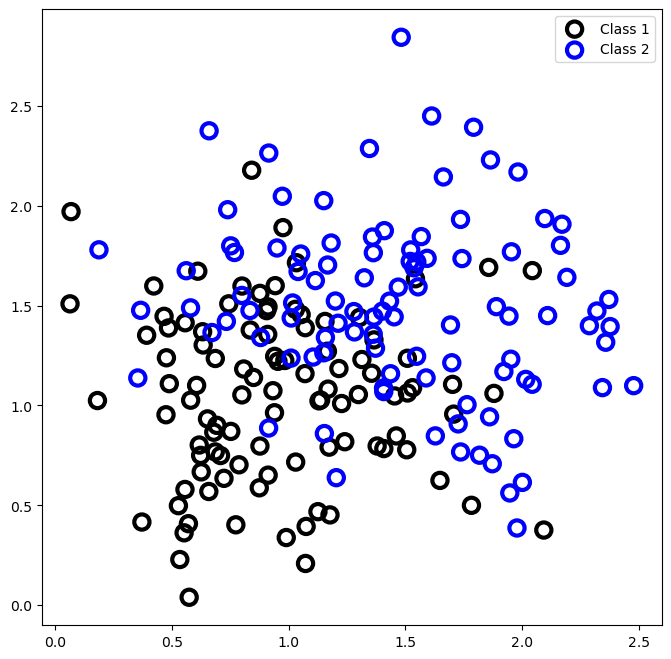

In [1]:
import numpy as np
import matplotlib.pyplot as plt

number_of_samples_in_each_class = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x_train_1 = np.random.multivariate_normal(mu1, sigma, number_of_samples_in_each_class)
x_train_2 = np.random.multivariate_normal(mu2, sigma, number_of_samples_in_each_class)
x_train = np.concatenate((x_train_1, x_train_2))
y_train = np.concatenate((np.ones(number_of_samples_in_each_class), np.zeros(number_of_samples_in_each_class)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x_train_2[:, 0], x_train_2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()